<a href="https://colab.research.google.com/github/raianegoncalves/back-end-python/blob/main/desafio_individual_probabilidade_amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [2]:
### bibliotecas base
import pandas as pd
import numpy as np
import json
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

Importando df e pedindo para fazer separação a partir do ","

In [4]:
df  = pd.read_csv('populacao_brasileira.csv', sep=',')
df.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [6]:
#Remover a coluna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['estado', 'idade', 'escolaridade', 'nível de proficiência em inglês',
       'renda', 'sexo'],
      dtype='object')

In [7]:
#renomear colunas
df = df.rename(columns={
    'estado': 'Estado',
    'idade': 'Idade',
    'escolaridade': 'Escolaridade',
    'nível de proficiência em inglês': 'Proficiência Inglês',
    'renda': 'Renda',
    'sexo': 'Sexo'
})

df.columns

Index(['Estado', 'Idade', 'Escolaridade', 'Proficiência Inglês', 'Renda',
       'Sexo'],
      dtype='object')

1- Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente


In [8]:
# Primeiro, verificar quais são os valores possíveis nessa coluna
print(df['Proficiência Inglês'].unique())

# Contar o número total de pessoas e o número de pessoas fluentes em inglês
total_pessoas = len(df)
pessoas_avancado = df[df['Proficiência Inglês'] == 'Avançado'].shape[0]

['Intermediário' 'Básico' 'Avançado']


In [9]:
# Calcular a probabilidade de uma pessoa ser fluente
probabilidade_avancado = pessoas_avancado / total_pessoas

# Calcular a probabilidade complementar
probabilidade_complementar = 1 - probabilidade_avancado

print(f'Probabilidade de escolher uma pessoa que não é avançado em inglês: {probabilidade_complementar:.2f}')

Probabilidade de escolher uma pessoa que não é avançado em inglês: 0.66


2- Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [10]:
#Primeiro, verificar quais são os valores possíveis nessa coluna
print(df['Estado'].unique())

['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']


In [11]:
#Filtrar as pessoas dos estados AL e PA
df_estado = df[df['Estado'].isin(['AL', 'PA'])]

#Contar o número total de pessoas desses estados
total_estado_pessoas = len(df_estado)
total_estado_pessoas

79

In [12]:
#Contar o número de pessoas com renda superior a 5 mil reais
pessoas_renda_alta = df_estado[df_estado['Renda'] > 5000].shape[0]


#Calcular a probabilidade
probabilidade_renda_alta = pessoas_renda_alta / total_estado_pessoas
print(f'Probabilidade de uma pessoa dos estados AL ou PA ter uma renda superior a 5 mil reais: {probabilidade_renda_alta:.2f}')

Probabilidade de uma pessoa dos estados AL ou PA ter uma renda superior a 5 mil reais: 0.05


3- Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [13]:
#Filtrar pessoas de AM
df_am = df[df['Estado'] == 'AM']

#Contar total de pessoas em AM
total_am = len(df_am)

In [14]:
#Contar o número de pessoas com ensino superior completo no Amazonas
pessoas_superior = df_am[df_am['Escolaridade'] == 'Superior'].shape[0]

#Calcular a probabilidade
probabilidade_superior_amazonas = pessoas_superior / total_am

print(f'Probabilidade de uma pessoa no estado do Amazonas ter ensino superior completo: {probabilidade_superior_amazonas:.2f}')

Probabilidade de uma pessoa no estado do Amazonas ter ensino superior completo: 0.24


In [15]:
# Para calcular a probabilidade de a quinta pessoa que você conversar ser amazonense e ter ensino superior completo:
if total_am >= 5:
    quinta_pessoa = df_am.iloc[4]  # Pega a quinta pessoa (índice 4)
    tem_superior = quinta_pessoa['Escolaridade'] == 'Superior'
    probabilidade_quinta_pessoa_superior = 1 if tem_superior else 0
else:
    probabilidade_quinta_pessoa_superior = None  # Menos de 5 pessoas no Amazonas

print(f'Probabilidade de a quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: {probabilidade_quinta_pessoa_superior}')

Probabilidade de a quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: 0


4- Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

In [16]:
#Definir faixas de renda
faixa = 1500
faixas = np.arange(0, df['Renda'].max() + faixa, faixa)
df['Faixa'] = pd.cut(df['Renda'], bins=faixas)

#Contar o número de pessoas em cada faixa
contagem_faixa = df['Faixa'].value_counts().sort_index()

print("Número de pessoas em cada faixa de renda:")
print(contagem_faixa)

# Calcular a densidade de probabilidade
kde = stat.gaussian_kde(df['Renda'])
x = np.linspace(df['Renda'].min(), df['Renda'].max(), 1000)
pdf = kde(x)

Número de pessoas em cada faixa de renda:
Faixa
(0.0, 1500.0]        55
(1500.0, 3000.0]    414
(3000.0, 4500.0]    442
(4500.0, 6000.0]     89
Name: count, dtype: int64


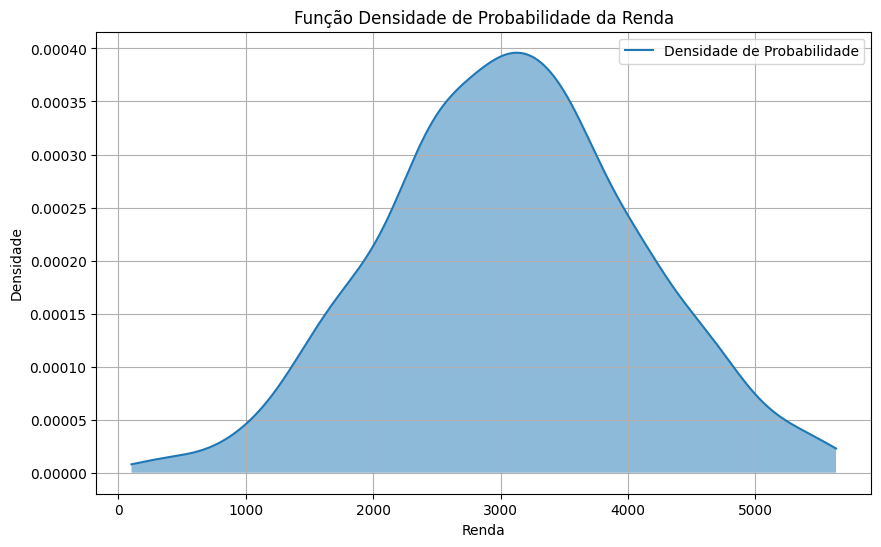

In [17]:
# Plotar gráfico para a função densidade de probabilidade
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Densidade de Probabilidade')
plt.fill_between(x, pdf, alpha=0.5)
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.title('Função Densidade de Probabilidade da Renda')
plt.legend()
plt.grid(True)
plt.show()

5- Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [18]:
# Calcular a média e a variância da renda
media_renda = df['Renda'].mean() #mean() calcula a média
variancia_renda = df['Renda'].var() #var() calcula a variância.

print(f'Média da renda: {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')

# Gerar a distribuição normal com base na média e variância
# Definir o intervalo de valores
x = np.linspace(df['Renda'].min(), df['Renda'].max(), 1000) #Intervalo de Valores: np.linspace cria uma gama de valores para plotagem.
# Gerar a distribuição normal
pdf = stat.norm.pdf(x, loc=media_renda, scale=np.sqrt(variancia_renda)) #Distribuição Normal: stat.norm.pdf calcula a densidade da distribuição normal com a média e o desvio padrão (raiz quadrada da variância).

Média da renda: 3082.54
Variância da renda: 993156.23


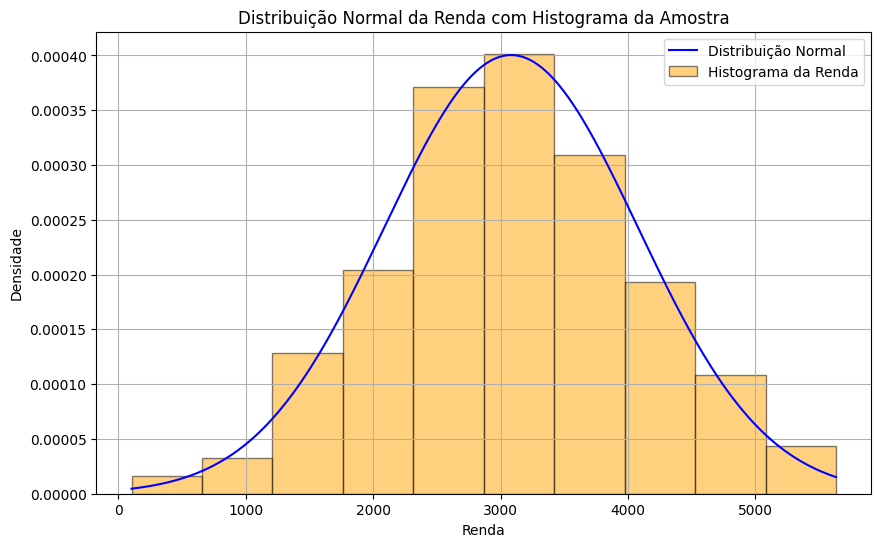

In [19]:
# Plotar o gráfico de distribuição normal e a renda da amostra
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='blue')
plt.hist(df['Renda'], bins=10, density=True, alpha=0.5, color='orange', edgecolor='black', label='Histograma da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.title('Distribuição Normal da Renda com Histograma da Amostra')
plt.legend()
plt.grid(True)
plt.show()

6 - Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [23]:
# Calcular a probabilidade de ter pós-graduação no conjunto de dados
num_pos_graduacao = df[df['Escolaridade'] == 'Pós-graduação'].shape[0] #num_pos_graduacao conta quantas pessoas têm pós-graduação no conjunto original.
total_pessoas = df.shape[0]
prob_pos_graduacao = num_pos_graduacao / total_pessoas #prob_pos_graduacao é a probabilidade de uma pessoa aleatória ter pós-graduação.

print(f'Probabilidade de uma pessoa ter pós-graduação no conjunto original: {prob_pos_graduacao:.4f}')

Probabilidade de uma pessoa ter pós-graduação no conjunto original: 0.2530


In [24]:
# Calcular a probabilidade de encontrar 243 mil pessoas com pós-graduação em 1 milhão de habitantes
n = 1000000  # Número de habitantes
k = 243000  # Número de pessoas com pós-graduação que queremos encontrar

# Usar a distribuição binomial para calcular a probabilidade
probabilidade = stat.binom.pmf(k, n, prob_pos_graduacao) #A função stat.binom.pmf(k, n, prob_pos_graduacao) calcula a probabilidade de observar exatamente 243 mil pessoas com pós-graduação (k = 243000) em uma amostra de 1 milhão de habitantes (n = 1000000) com a probabilidade de sucesso dada pela proporção de pós-graduados.

print(f'Probabilidade de encontrar 243 mil pessoas com pós-graduação em 1 milhão de habitantes: {probabilidade:.10f}')

Probabilidade de encontrar 243 mil pessoas com pós-graduação em 1 milhão de habitantes: 0.0000000000


7- Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade

In [25]:
# Contar a frequência de cada nível de escolaridade
frequencia_escolaridade = df['Escolaridade'].value_counts() #value_counts() para contar quantas vezes cada nível de escolaridade aparece no DataFrame.

In [26]:
# Calcular a frequência relativa (probabilidade) de cada nível
probabilidade_escolaridade = frequencia_escolaridade / frequencia_escolaridade.sum() #Calculamos a probabilidade de cada nível de escolaridade dividindo a frequência de cada nível pelo total.

In [27]:
# Calcular a função de densidade acumulada (CDF) somando cumulativamente as probabilidades
cdf_escolaridade = probabilidade_escolaridade.cumsum() #A CDF é calculada com cumsum(), que soma cumulativamente as probabilidades

In [28]:
#Respostas
print("Frequência relativa de cada nível de escolaridade:")
print(probabilidade_escolaridade)

print("\nFunção de Densidade Acumulada (CDF) para cada nível de escolaridade:")
print(cdf_escolaridade)

Frequência relativa de cada nível de escolaridade:
Escolaridade
Fundamental      0.266
Pós-graduação    0.253
Superior         0.243
Médio            0.238
Name: count, dtype: float64

Função de Densidade Acumulada (CDF) para cada nível de escolaridade:
Escolaridade
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: count, dtype: float64


8 - Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [29]:
# Suponha que você tenha os seguintes dados
# Proporção amostral de pessoas com inglês intermediário
p_hat = 0.3  #p_hat é a proporção de pessoas com nível de inglês intermediário.

# Tamanho da amostra
n = 1000  #n pelo número real de pessoas na amostra.

# Nível de confiança (95% => Z = 1.96)
Z = stat.norm.ppf(0.975)  #stat.norm.ppf(0.975) retorna o valor crítico para 95% de confiança.

# Calcular a margem de erro
margem_erro = Z * np.sqrt((p_hat * (1 - p_hat)) / n)

print(f'Margem de erro amostral: {margem_erro:.4f}')

Margem de erro amostral: 0.0284


9 - Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [31]:
#Média da renda ja está calculada lá em cima
media_renda

3082.5371800000003

In [32]:
#Definir a condição para renda mil reais superior à média
pessoas_renda_superior = df[df['Renda'] > (media_renda + 1000)].shape[0]
total_pessoas = df.shape[0]

#Calcular a proporção (probabilidade amostral)
prob_renda_superior = pessoas_renda_superior / total_pessoas
print(f'Proporção de pessoas com renda mil reais superior à média: {prob_renda_superior:.4f}')

Proporção de pessoas com renda mil reais superior à média: 0.1610


In [33]:
# N=100 de amostra
n = 1000

#Pessoas que queremos encontrar K=60
k = 60

# Usar a distribuição binomial para calcular a probabilidade
probabilidade_60 = stat.binom.pmf(k, n, prob_renda_superior) #stat.binom.pmf(k, n, p) calcula a probabilidade de observar exatamente 60 pessoas com renda superior à média em uma amostra de n

print(f'Probabilidade de encontrar 60 pessoas com renda superior à média: {probabilidade_60:.10f}')

Probabilidade de encontrar 60 pessoas com renda superior à média: 0.0000000000


10 - Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [35]:
# Primeiro, verificar quais são os valores possíveis nessa coluna
print(df['Estado'].unique())

['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']


In [36]:
#Dicionário para criar a coluna Região para cada sigla a partir do Estado
mapa_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul'
}

# Criar a nova coluna 'Região' usando a coluna 'Estado'
df['Região'] = df['Estado'].map(mapa_regiao)

In [37]:
#Verificar se deu certo
print(df['Região'].unique())

['Nordeste' 'Norte' 'Centro-Oeste' 'Sul' 'Sudeste']


In [39]:
#Filtrar as condições
condicao = (
    (df['Região'] == 'Sudeste') &
    (df['Sexo'] == 'Masculino') &
    (df['Escolaridade'] == 'Ensino Fundamental') &
    (df['Renda'] > 2000)
)

#Filtrar as pessoas que atendem às condições
pessoas_criterio = df[condicao].shape[0]

In [40]:
#Calcular o total de pessoas na amostra
total_pessoas = df.shape[0]

#Calcular a probabilidade
probabilidade = pessoas_criterio / total_pessoas

print(f'Probabilidade de escolher alguém do Sudeste que seja homem, com ensino fundamental e renda superior a 2 mil reais: {probabilidade:.4f}')

Probabilidade de escolher alguém do Sudeste que seja homem, com ensino fundamental e renda superior a 2 mil reais: 0.0000
